### PACKAGES 

In [1]:
# importing packages 
import tensorflow as tf 
import keras 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

2022-06-16 16:32:00.329688: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [3]:
# Raphael solution

physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

2022-06-16 16:32:03.490747: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-16 16:32:03.493171: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-06-16 16:32:03.542008: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:61:00.0 name: NVIDIA GeForce GTX 1660 computeCapability: 7.5
coreClock: 1.785GHz coreCount: 22 deviceMemorySize: 5.80GiB deviceMemoryBandwidth: 178.86GiB/s
2022-06-16 16:32:03.542049: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-06-16 16:32:03.544982: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-06-16 16:32:03.545072: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.1

### DATA

In [4]:
# loading data 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

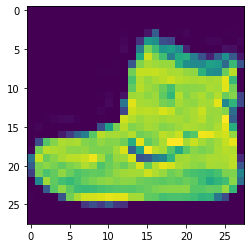

In [5]:
plt.imshow(X_train[0])

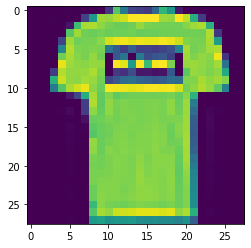

In [6]:
plt.imshow(X_train[1])

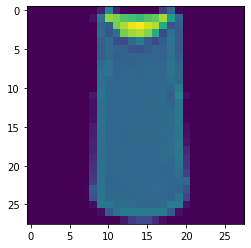

In [7]:
plt.imshow(X_train[2])

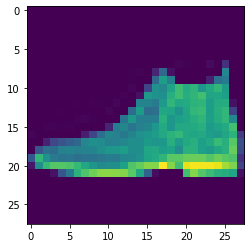

In [8]:
plt.imshow(X_test[0])

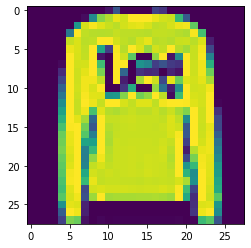

In [9]:
plt.imshow(X_test[1])

In [10]:
# We are flattening images cause we start with a simplemodel 
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
# data sizes 
len(y_train)
len(y_test)
X_train.shape
X_test.shape

(10000, 784)

### ARCHITECTURE 

In [12]:
# difyning model
model = Sequential()
model.add(Dense(10, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compiling model 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


2022-06-16 16:32:05.730383: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-16 16:32:05.731207: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-16 16:32:05.731672: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:61:00.0 name: NVIDIA GeForce GTX 1660 computeCapability: 7.5
coreClock: 1.785GHz coreCount: 22 deviceMemorySize: 5.80GiB deviceMemoryBandwidth: 178.86GiB/s
2022-06-16 16:32:05.731712: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-06-16 16:32:05.731748: I tensorflow/stream_executor/plat

In [13]:
# si cellule audessus marche pas alors : 
# au terminal :
# 1. nvidia-smi/gestion de tâches 
# 2. je prend le PID puis taper kill -9 PID 